In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel("Data Model - Pizza Sales.xlsx")

In [3]:
df.head(5)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [13]:
df.isna().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
month                0
weekday              0
year                 0
dtype: int64

# Most popular hours / weekdays

In [14]:
df['month'] = df['order_date'].dt.month

In [15]:
df['month'].value_counts()

7     4301
5     4239
3     4186
11    4185
1     4156
8     4094
4     4067
6     4025
2     3892
12    3859
9     3819
10    3797
Name: month, dtype: int64

In [28]:
df['weekday'] = df['order_date'].dt.dayofweek

In [29]:
df['weekday'].value_counts()

4    8106
5    7355
3    7323
2    6797
1    6753
0    6369
6    5917
Name: weekday, dtype: int64

In [30]:
df['year'] = df['order_date'].dt.year
df['year']

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
48615    2015
48616    2015
48617    2015
48618    2015
48619    2015
Name: year, Length: 48620, dtype: int64

In [31]:
def day_of_week(x):
    weekdays = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    if 0 <= x <= 6:
        return weekdays[x]
    
df['weekday'] = df['weekday'].apply(day_of_week)

In [32]:
df['weekday'].value_counts()

Fri    8106
Sat    7355
Thu    7323
Wed    6797
Tue    6753
Mon    6369
Sun    5917
Name: weekday, dtype: int64

In [33]:
df['order_time'] = df['order_time'].astype(str)
df['hour'] = df['order_time'].apply(lambda x:x.split(':')[0])

In [34]:
df[['order_time','hour']]

,order_time,hour
0,11:38:36,11
1,11:57:40,11
2,11:57:40,11
3,11:57:40,11
4,11:57:40,11
...,...,...
48615,21:23:10,21
48616,21:23:10,21
48617,21:23:10,21
48618,22:09:54,22


In [35]:
heatmap = df.groupby(['weekday','hour'])['quantity'].sum().reset_index(name='pizzas')

In [36]:
pivot = heatmap.pivot(index = 'weekday',columns = 'hour', values = 'pizzas')

<AxesSubplot:xlabel='hour', ylabel='weekday'>

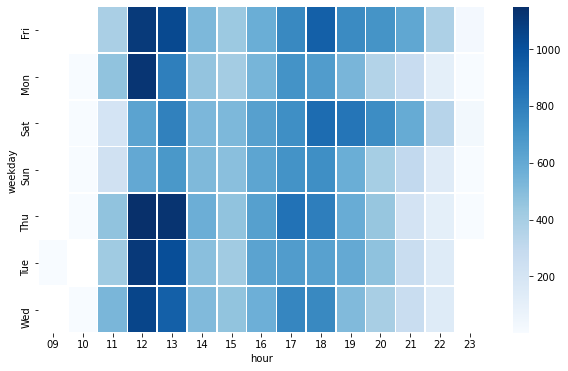

In [37]:
f,ax = plt.subplots(figsize =(10,6))
sns.heatmap(pivot, ax = ax,cmap = 'Blues',linewidth = .5)

# Most popular Months

In [38]:
def month_of_year(x):
    weekdays = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    if 0 <= x-1 <= 12:
        return weekdays[x-1]
    
df['month'] = df['month'].apply(month_of_year)

In [39]:
df['month'].value_counts()

Jul    4301
May    4239
Mar    4186
Nov    4185
Jan    4156
Aug    4094
Apr    4067
Jun    4025
Feb    3892
Dec    3859
Sep    3819
Oct    3797
Name: month, dtype: int64

In [44]:
heatmap = df.groupby(['month','year'])['quantity'].sum().reset_index(name = "Monthly")

In [45]:
pivot1 = heatmap.pivot(index = 'month',columns = 'year', values = 'Monthly'
                       )

<AxesSubplot:xlabel='year', ylabel='month'>

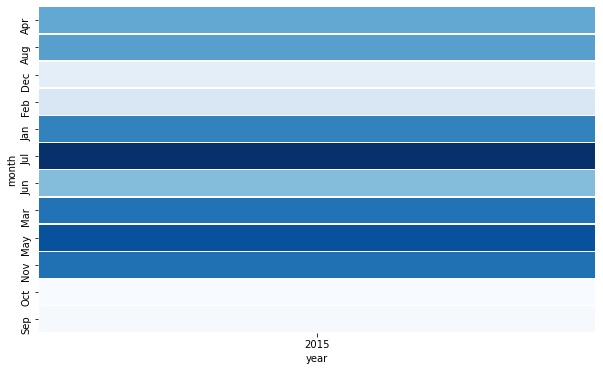

In [47]:
f,ax = plt.subplots(figsize =(10,6))
sns.heatmap(pivot1, ax = ax,cmap = 'Blues',linewidth = .5,cbar = False)

In [48]:
set(df['pizza_name'])

{'The Barbecue Chicken Pizza',
 'The Big Meat Pizza',
 'The Brie Carre Pizza',
 'The Calabrese Pizza',
 'The California Chicken Pizza',
 'The Chicken Alfredo Pizza',
 'The Chicken Pesto Pizza',
 'The Classic Deluxe Pizza',
 'The Five Cheese Pizza',
 'The Four Cheese Pizza',
 'The Greek Pizza',
 'The Green Garden Pizza',
 'The Hawaiian Pizza',
 'The Italian Capocollo Pizza',
 'The Italian Supreme Pizza',
 'The Italian Vegetables Pizza',
 'The Mediterranean Pizza',
 'The Mexicana Pizza',
 'The Napolitana Pizza',
 'The Pepper Salami Pizza',
 'The Pepperoni Pizza',
 'The Pepperoni, Mushroom, and Peppers Pizza',
 'The Prosciutto and Arugula Pizza',
 'The Sicilian Pizza',
 'The Soppressata Pizza',
 'The Southwest Chicken Pizza',
 'The Spicy Italian Pizza',
 'The Spinach Pesto Pizza',
 'The Spinach Supreme Pizza',
 'The Spinach and Feta Pizza',
 'The Thai Chicken Pizza',
 'The Vegetables + Vegetables Pizza'}

In [49]:
df['pizza_name'] = df['pizza_name'].apply(lambda x: x.split('The ')[1])
df['pizza_name'] = df['pizza_name'].apply(lambda x: x.split(' Pizza')[0])

In [ ]:
set(df['pizza_name'])

In [ ]:
popular_pizzas = df.groupby(['pizza_name','pizza_size'])['quantity'].sum().reset_index(name = 'pizza count')

In [ ]:
pivot = popular_pizzas.pivot(index = 'pizza_name',columns = 'pizza_size', values = 'pizza count')

In [ ]:
pivot

In [ ]:
f,ax = plt.subplots(figsize =(10,12))
sns.heatmap(pivot, ax = ax,cmap = 'Blues',linewidth = .5, cbar = False,linecolor = 'black',
           annot = True,fmt = '.0f')

In [ ]:
f,ax = plt.subplots(figsize =(10,12))
sns.heatmap(pivot.apply(lambda x: x/x.sum()), ax = ax,cmap = 'Blues',linewidth = .5, cbar = False,linecolor = 'black',
           annot = True)

In [ ]:
popular_pizzas = popular_pizzas[popular_pizzas['pizza_size'].isin(['S','M','L'])]

In [ ]:
pivot = popular_pizzas.pivot(index = 'pizza_name',columns = 'pizza_size', values = 'pizza count')

In [ ]:
f,ax = plt.subplots(figsize =(10,12))
sns.heatmap(pivot.apply(lambda x: x/x.sum()), ax = ax,cmap = 'Blues',linewidth = .5, cbar = False,linecolor = 'black',
           annot = True)

# 3. Most popular ingredients 

In [ ]:
df['pizza_ingredients'] = df['pizza_ingredients'].apply(lambda x:x.split(','))

In [ ]:
df['pizza_ingredients']

In [ ]:
ingredient_dict = {}
for pizza in df['pizza_ingredients']:
    for ingredient in pizza:
        if ingredient in ingredient_dict:
            ingredient_dict[ingredient]+=1
        else:
            ingredient_dict[ingredient] = 1

In [ ]:
sorted(ingredient_dict.items(),key = lambda item: item[1],reverse = True)[:10]

# 4.Highest revenue pizzas

In [ ]:
df.groupby('pizza_name')['total_price'].sum().sort_values(ascending = False).head(10)

In [ ]:
df.groupby('pizza_id')['total_price'].sum().sort_values(ascending = False).head(10)

# 5.All about orders

In [ ]:
df['quantity'].sum() / df['order_id'].nunique()

In [ ]:
df['total_price'].sum() / df['order_id'].nunique()

In [ ]:
df.groupby('order_id')[['quantity','total_price']].sum().sort_values('quantity',ascending = False).head(10)

In [ ]:
orders = df.groupby('order_id')['quantity'].sum().value_counts().reset_index(name = 'quantity').sort_values('quantity')
orders

In [ ]:
sns.barplot(x = 'quantity',y = 'index',data = orders,log = True)

# 2-pizza combos

In [ ]:
df['full_order'] = df.groupby('order_id')['pizza_name'].transform(lambda x:'-'.join(x))

In [ ]:
df['full_order']

In [ ]:
combos = df[['order_id','full_order']].drop_duplicates()

In [ ]:
combos

In [ ]:
from itertools import combinations
from collections import Counter

In [ ]:
count = Counter()
for row in combos['full_order']:
    row_list = row.split('-')
    count.update(Counter(combinations(row_list,2)))

In [ ]:
print(count)